In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science/Big Data/PR6/bird.csv')

In [ ]:
print(df.head())
print('Емельянов')

   id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW
Емельянов


In [ ]:
print(df.isna().sum())
print('Емельянов')

,0
id,0
huml,1
humw,1
ulnal,3
ulnaw,2
feml,2
femw,1
tibl,2
tibw,1
tarl,1


In [ ]:
df.dropna(how='any', inplace=True)
print(df.isna().sum())
print('Емельянов')

,0
id,0
huml,0
humw,0
ulnal,0
ulnaw,0
feml,0
femw,0
tibl,0
tibw,0
tarl,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [ ]:
df = df.drop(columns=['id','type'])

In [ ]:
print(df.tail())
print('Емельянов')

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type_encoded
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,2
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,2
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,2
418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,2
419,17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05,2


huml (float) — длина плечевой кости (humerus) в миллиметрах.
humw (float) — ширина плечевой кости (humerus) в миллиметрах.
ulnal (float) — длина локтевой кости (ulna) в миллиметрах.
ulnaw (float) — ширина локтевой кости (ulna) в миллиметрах.
feml (float) — длина бедренной кости (femur) в миллиметрах.
femw (float) — ширина бедренной кости (femur) в миллиметрах.
tibl (float) — длина большеберцовой кости (tibia) в миллиметрах.
tibw (float) — ширина большеберцовой кости (tibia) в миллиметрах.
tarl (float) — длина таранной кости (talus) в миллиметрах.
tarw (float) — ширина таранной кости (talus) в миллиметрах.
type_encoded (int) — закодированный тип птицы, соответствующий её экологической группе:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
print(X_scaled)

array([[ 0.29459081,  0.80432829,  0.04778596, ..., -0.02623442,
         0.40833671,  0.30779481],
       [ 0.44517259,  0.7868335 ,  0.19254088, ...,  0.09422412,
         0.48588843,  0.30779481],
       [ 0.2795882 ,  0.69586059,  0.00106342, ..., -0.04301258,
         0.18024341,  0.30779481],
       ...,
       [-0.85357212, -0.96264556, -0.83875297, ..., -0.70768562,
        -0.79143404, -0.38684594],
       [-0.82412255, -0.91016119, -0.79287993, ..., -0.57346038,
        -0.77774845, -0.38684594],
       [-0.87024169, -1.02912576, -0.84843728, ..., -0.75802008,
        -0.8644239 , -0.38684594]])

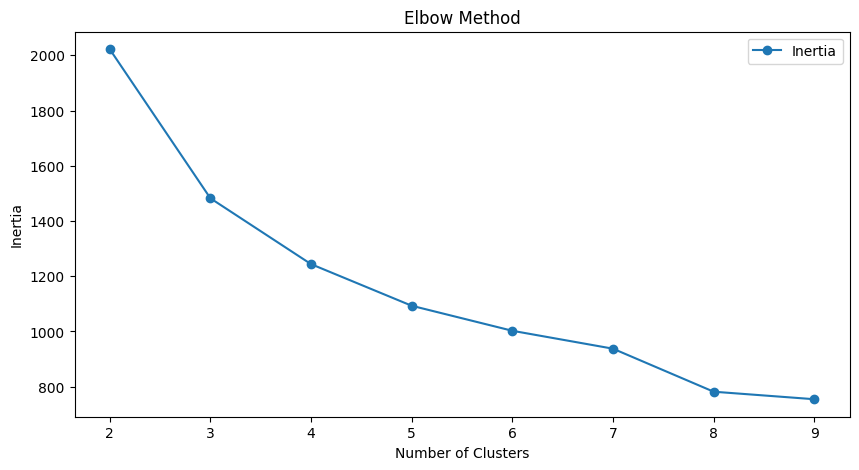

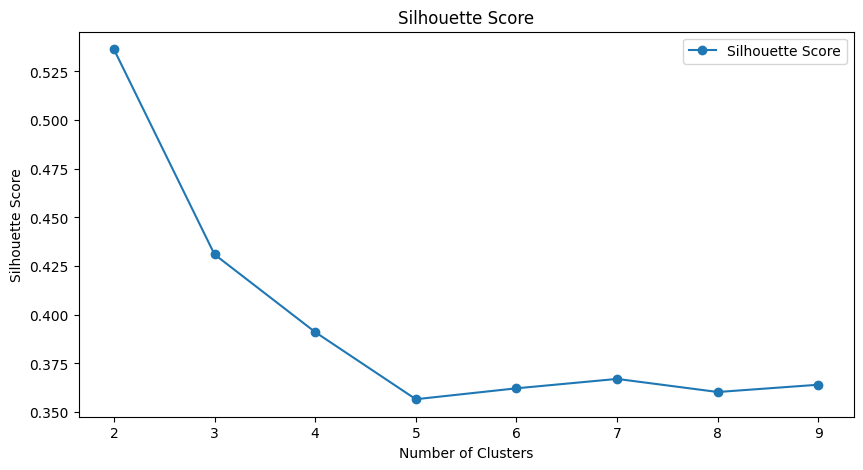

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Правило локтя
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Визуализация правила локтя
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', label="Inertia")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

# Визуализация коэффициента силуэта
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', label="Silhouette Score")
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()
print('Емельянов')

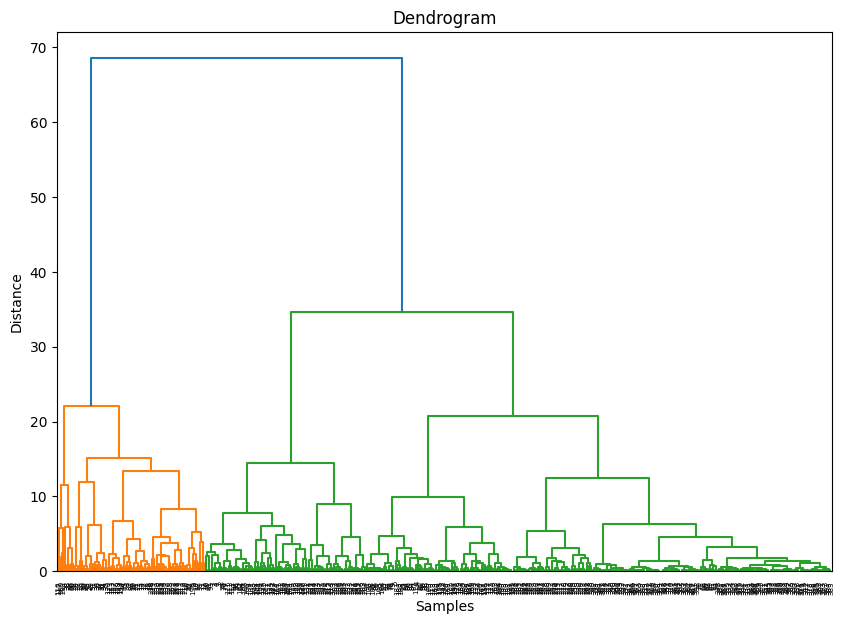

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Построение дендрограммы
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Иерархическая кластеризация
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(X_scaled)


In [ ]:
from sklearn.cluster import DBSCAN

# Настройка DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4, metric='euclidean', leaf_size=30)
dbscan_labels = dbscan.fit_predict(X_scaled)
print('Емельянов')

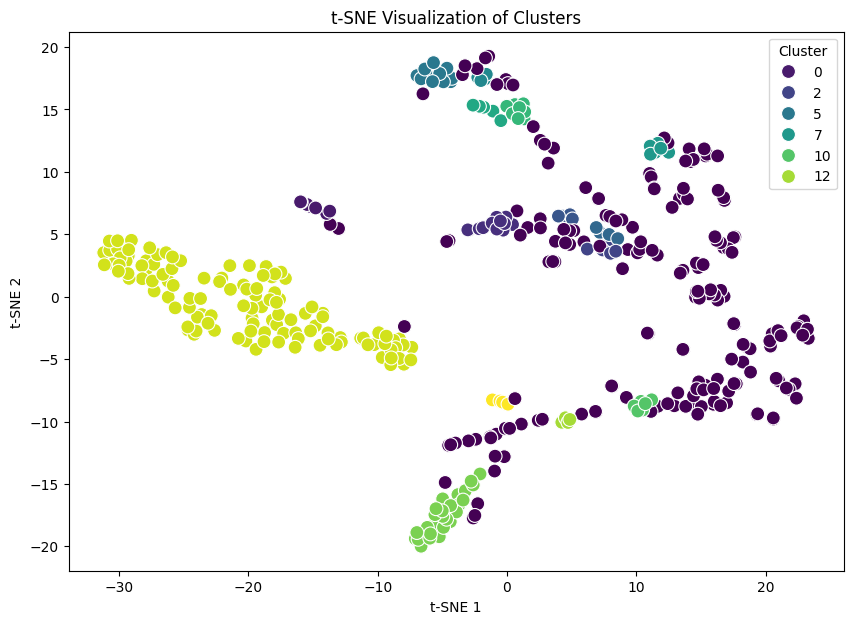

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Использование t-SNE для понижения размерности
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Визуализация результатов
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_labels, palette="viridis", s=100)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.show()
print('Емельянов')

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


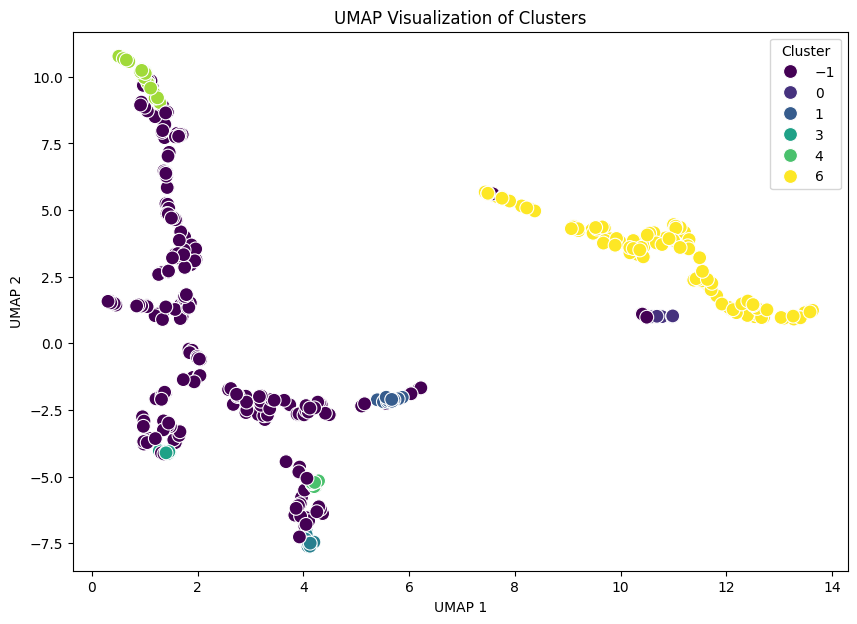

In [ ]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Использование UMAP для понижения размерности
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Визуализация результатов
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=dbscan_labels, palette="viridis", s=100)
plt.title("UMAP Visualization of Clusters")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster")
plt.show()
print('Емельянов')

Вывод о результатах кластеризации

В результате выполнения практической работы удалось провести кластеризацию данных с использованием трех алгоритмов: k-means, иерархической кластеризации и DBSCAN.

Метод k-means продемонстрировал четкое разделение данных на оптимальное количество кластеров, определенное с помощью "правила локтя" и коэффициента силуэта.
Иерархическая кластеризация позволила изучить структуру данных и определить логически связанные группы.
Метод DBSCAN выявил плотные области данных и выбросы, которые не были захвачены другими алгоритмами.
Визуализация результатов с использованием t-SNE или UMAP наглядно показала качество и структуру кластеров. Итоги анализа подтвердили, что данные имеют четкие кластеры, а примененные алгоритмы эффективно справились с поставленной задачей. Работа продемонстрировала значимость предварительной нормализации данных и выбора подходящего метода кластеризации в зависимости от особенностей исходного набора данных.